# PSM Matching for ABIDE
Here are the samples I want
1) full sample, w site: diagnosis ratio 1, age,  motion

2) ADOS sample, w site: age, motion

3) SRS sample, w site: diagnosis ratio 1, age, motion

4) full sample, w site: diagnosis ratio 1, age, motion, FIQ

5) ? maybe FIQ on the other ones as well, depending on how nice that goes

In [1]:
# Get the imports
library(MatchIt)

Loading required package: MASS


In [2]:
# Set up the input paths
qc_maybe = '/data1/abide/Pheno/new/abide_qc_maybe.csv'
qc_pass = '/data1/abide/Pheno/new/abide_qc_pass.csv'

# Set up the output paths
abide_full_psm = '/data1/abide/Pheno/new/abide_full_psm.csv'
abide_ados_psm = '/data1/abide/Pheno/new/abide_ados_psm.csv'
abide_srs_psm = '/data1/abide/Pheno/new/abide_srs_psm.csv'
abide_fiq_psm = '/data1/abide/Pheno/new/abide_fiq_psm.csv'

# Set up the config paths
caliper_path = '/home/surchs/GDrive/PhD/Pheno/assignments/abide_calipers_maybe.csv'

In [3]:
# Read the data
data = read.csv(qc_pass)

In [4]:
# Remap the values of the diagnosis column
# This will change the meaning, now ASD = 1, TDC = 0
data$DX_GROUP[data$DX_GROUP == 2] <- 0
# Make a subset for only male participants
data_male = subset(data, SEX==1)

In [5]:
# Make a copy for non-nan values for FIQ and SRS
data_fiq = data_male[!is.na(data_male$FIQ),]
data_srs = data_male[!is.na(data_male$SRS_RAW_TOTAL),]
data_ados = data_male[!is.na(data_male$ADOS_sb_sev),]

In [6]:
# Get the column names
names(data_male)

[1] "SUB_ID"                          "SITE_ID"                        
  [3] "FILE_ID"                         "DX_GROUP"                       
  [5] "DSM_IV_TR"                       "AGE_AT_SCAN"                    
  [7] "SEX"                             "HANDEDNESS_CATEGORY"            
  [9] "HANDEDNESS_SCORES"               "FIQ"                            
 [11] "VIQ"                             "PIQ"                            
 [13] "FIQ_TEST_TYPE"                   "VIQ_TEST_TYPE"                  
 [15] "PIQ_TEST_TYPE"                   "ADI_R_SOCIAL_TOTAL_A"           
 [17] "ADI_R_VERBAL_TOTAL_BV"           "ADI_RRB_TOTAL_C"                
 [19] "ADI_R_ONSET_TOTAL_D"             "ADI_R_RSRCH_RELIABLE"           
 [21] "ADOS_MODULE"                     "ADOS_TOTAL"                     
 [23] "ADOS_COMM"                       "ADOS_SOCIAL"                    
 [25] "ADOS_STEREO_BEHAV"               "ADOS_RSRCH_RELIABLE"            
 [27] "ADOS_GOTHAM_SOCAFFECT"           "ADOS_GOTHAM_RRB"                
 [29] "ADOS_GOTHAM_TOTAL"               "ADOS_GOTHAM_SEVERITY"           
 [31] "SRS_VERSION"                     "SRS_RAW_TOTAL"                  
 [33] "SRS_AWARENESS"                   "SRS_COGNITION"                  
 [35] "SRS_COMMUNICATION"               "SRS_MOTIVATION"                 
 [37] "SRS_MANNERISMS"                  "SCQ_TOTAL"                      
 [39] "AQ_TOTAL"                        "COMORBIDITY"                    
 [41] "CURRENT_MED_STATUS"              "MEDICATION_NAME"                
 [43] "OFF_STIMULANTS_AT_SCAN"          "VINELAND_RECEPTIVE_V_SCALED"    
 [45] "VINELAND_EXPRESSIVE_V_SCALED"    "VINELAND_WRITTEN_V_SCALED"      
 [47] "VINELAND_COMMUNICATION_STANDARD" "VINELAND_PERSONAL_V_SCALED"     
 [49] "VINELAND_DOMESTIC_V_SCALED"      "VINELAND_COMMUNITY_V_SCALED"    
 [51] "VINELAND_DAILYLVNG_STANDARD"     "VINELAND_INTERPERSONAL_V_SCALED"
 [53] "VINELAND_PLAY_V_SCALED"          "VINELAND_COPING_V_SCALED"       
 [55] "VINELAND_SOCIAL_STANDARD"        "VINELAND_SUM_SCORES"            
 [57] "VINELAND_ABC_STANDARD"           "VINELAND_INFORMANT"             
 [59] "WISC_IV_VCI"                     "WISC_IV_PRI"                    
 [61] "WISC_IV_WMI"                     "WISC_IV_PSI"                    
 [63] "WISC_IV_SIM_SCALED"              "WISC_IV_VOCAB_SCALED"           
 [65] "WISC_IV_INFO_SCALED"             "WISC_IV_BLK_DSN_SCALED"         
 [67] "WISC_IV_PIC_CON_SCALED"          "WISC_IV_MATRIX_SCALED"          
 [69] "WISC_IV_DIGIT_SPAN_SCALED"       "WISC_IV_LET_NUM_SCALED"         
 [71] "WISC_IV_CODING_SCALED"           "WISC_IV_SYM_SCALED"             
 [73] "EYE_STATUS_AT_SCAN"              "AGE_AT_MPRAGE"                  
 [75] "BMI"                             "anat_cnr"                       
 [77] "anat_efc"                        "anat_fber"                      
 [79] "anat_fwhm"                       "anat_qi1"                       
 [81] "anat_snr"                        "func_efc"                       
 [83] "func_fber"                       "func_fwhm"                      
 [85] "func_dvars"                      "func_outlier"                   
 [87] "func_quality"                    "func_mean_fd"                   
 [89] "func_num_fd"                     "func_perc_fd"                   
 [91] "func_gsr"                        "qc_rater_1"                     
 [93] "qc_notes_rater_1"                "qc_anat_rater_2"                
 [95] "qc_anat_notes_rater_2"           "qc_func_rater_2"                
 [97] "qc_func_notes_rater_2"           "qc_anat_rater_3"                
 [99] "qc_anat_notes_rater_3"           "qc_func_rater_3"                
[101] "qc_func_notes_rater_3"           "SUB_IN_SMP"                     
[103] "max_rotation"                    "max_translation"                
[105] "status"                          "anat"                           
[107] "comment_anat"                    "func"                           
[109] 

In [84]:
table(data_srs$DX_GROUP)


  0   1 
109 128 

In [85]:
# Get the Site IDs
unique(data_srs$SITE_ID)

[1] USM      YALE     LEUVEN_1 NYU     
18 Levels: CALTECH CMU KKI LEUVEN_1 LEUVEN_2 MAX_MUN NYU OHSU OLIN ... YALE

Warning message:
In matchit2nearest(structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, : Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest


Call:
matchit(formula = DX_GROUP ~ FD_scrubbed + AGE_AT_SCAN, data = slice_data, 
    method = "nearest", caliper = 0.4, ratio = 1)

Summary of balance for all data:
            Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance           0.5589        0.5382     0.0541    0.0207  0.0110   0.0263
FD_scrubbed        0.1683        0.1671     0.0373    0.0012  0.0027   0.0049
AGE_AT_SCAN       13.9687       12.4641     3.0868    1.5046  0.7950   2.3054
            eQQ Max
distance     0.1696
FD_scrubbed  0.0268
AGE_AT_SCAN 21.4000


Summary of balance for matched data:
            Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance           0.5450        0.5337     0.0561    0.0112  0.0120   0.0133
FD_scrubbed        0.1737        0.1669     0.0385    0.0069  0.0049   0.0079
AGE_AT_SCAN       12.6183       12.1808     3.1767    0.4375  0.5600   0.9112
            eQQ Max
distance     0.0294
FD_scrubbed  0.0341
AGE_AT_SCAN  5.2900

Percent B

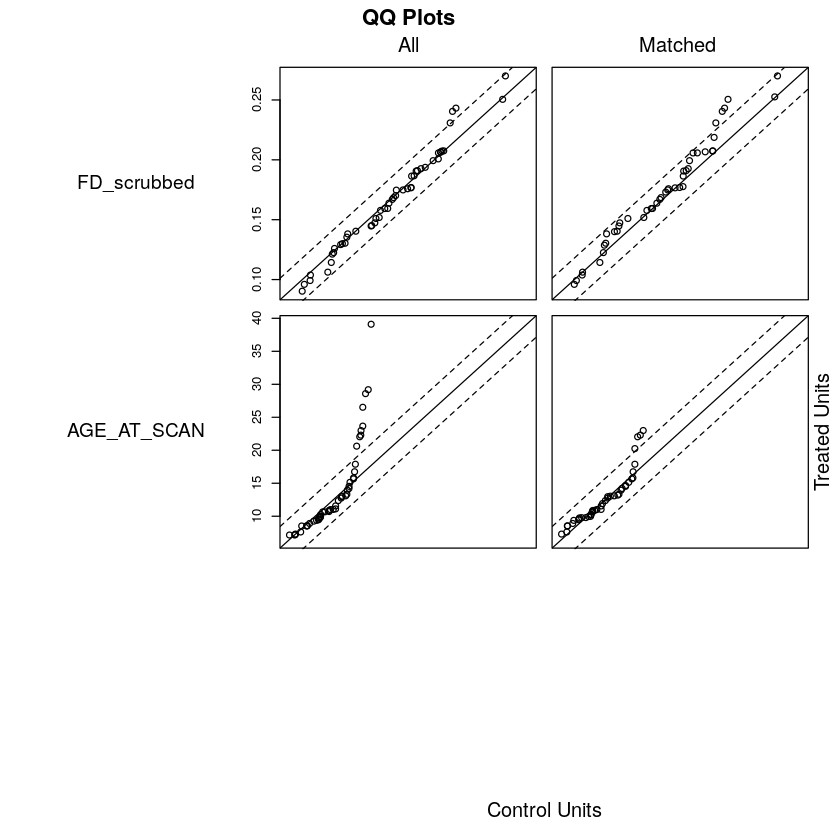

In [92]:
# Manually select the values
site = 'NYU'
covariates = c('SITE_ID','SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN', 'FD_scrubbed', 'frames_scrubbed')#, 'FIQ')
slice_data = subset(data_srs, SITE_ID==site, select=covariates)

matched = matchit(DX_GROUP ~ FD_scrubbed + AGE_AT_SCAN, data=slice_data, method="nearest", caliper=0.4, ratio=1)
summary(matched)
plot(matched)